# 导入训练数据

In [1]:
import pandas as pd
dfbg = pd.read_excel(r"BandgapDS.xlsx")
dfbg

,MA,FA,Cs,Rb,Pb,Sn,Br,Cl,I,Bandgap
0,1.000,0.000,0.000,0.00,1.0,0.0,0.00,0.00,1.00,1.550
1,0.000,0.000,1.000,0.00,1.0,0.0,0.00,0.00,1.00,1.800
2,0.000,0.000,1.000,0.00,1.0,0.0,0.33,0.00,0.67,1.910
3,0.000,0.000,1.000,0.00,1.0,0.0,1.00,0.00,0.00,2.300
4,0.500,0.500,0.000,0.00,0.5,0.5,0.00,0.00,1.00,1.250
...,...,...,...,...,...,...,...,...,...,...
814,0.100,0.800,0.050,0.05,1.0,0.0,0.05,0.00,0.95,1.530
815,0.000,0.931,0.049,0.02,1.0,0.0,0.01,0.02,0.97,1.540
816,0.153,0.747,0.050,0.05,1.0,0.0,0.05,0.00,0.95,1.563
817,0.000,0.850,0.100,0.05,1.0,0.0,0.10,0.00,0.90,1.550


In [2]:
col_groupby = dfbg.columns.tolist()
col_groupby.pop()
print(col_groupby)

['MA', 'FA', 'Cs', 'Rb', 'Pb', 'Sn', 'Br', 'Cl', 'I']


In [3]:
dfbg = dfbg.groupby(col_groupby).mean().reset_index()
dfbg

,MA,FA,Cs,Rb,Pb,Sn,Br,Cl,I,Bandgap
0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.000,1.000,1.25
1,0.0,0.0,1.0,0.0,0.4,0.6,0.000,0.000,1.000,1.30
2,0.0,0.0,1.0,0.0,0.4,0.6,0.100,0.000,0.900,1.33
3,0.0,0.0,1.0,0.0,0.4,0.6,0.200,0.000,0.800,1.35
4,0.0,0.0,1.0,0.0,0.4,0.6,0.333,0.000,0.667,1.42
...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.0,0.0,0.0,1.0,0.0,0.000,1.000,0.000,3.09
89,1.0,0.0,0.0,0.0,1.0,0.0,0.034,0.016,0.950,1.58
90,1.0,0.0,0.0,0.0,1.0,0.0,0.300,0.000,0.700,1.96
91,1.0,0.0,0.0,0.0,1.0,0.0,0.330,0.000,0.670,1.80


In [4]:
Y = dfbg['Bandgap']
X = dfbg.drop(['Bandgap'],axis=1)

# 使用随机森林进行训练

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=611)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_train_hat = rf_regressor.predict(X_train)
y_test_hat = rf_regressor.predict(X_test)

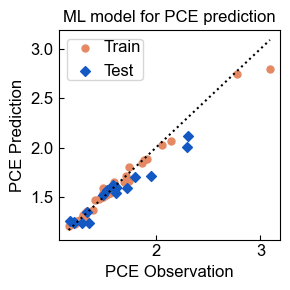

Train r: 0.9932316415550031
Train R2: 0.9781333050397373
Train RMSE: 0.042283885530421256
--------------------------------------
Test r: 0.968978986718972
Test R2: 0.869063108620592
Test RMSE: 0.11348491533196747


In [11]:
from letsplot1 import letsplot,get_element_ratio
letsplot(y_train,y_train_hat,y_test,y_test_hat)

✅ 图片已保存为: RF_Bandgap_prediction.tif


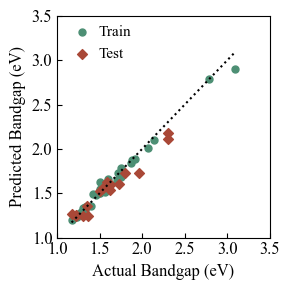

Train r: 0.994269565649284
Train R2: 0.9853451121080236
Train RMSE: 0.03461581533734251
--------------------------------------
Test r: 0.9755245858426089
Test R2: 0.9093765804107259
Test RMSE: 0.09441203265214615


In [6]:
from letsplotT import letsplot
letsplot(y_train,y_train_hat,y_test,y_test_hat)

In [7]:
Eg_reg = RandomForestRegressor(** {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100})
Eg_reg.fit(X, Y)

RandomForestRegressor(min_samples_split=3)

# 对自己数据的预测

In [8]:
df=pd.read_excel(r"perovskite_element_ratios1.xlsx")
import numpy as np
col_1 = ['MA', 'FA', 'Cs', 'Rb', 'Pb', 'Sn', 'Br', 'Cl', 'I']
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    0
FA    0
Cs    0
Rb    0
Pb    0
Sn    0
Br    0
Cl    0
I     0
dtype: int64


In [9]:
df = df.fillna(0)
df['Pb'] = pd.to_numeric(df['Pb'], errors='coerce').fillna(0)
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    0
FA    0
Cs    0
Rb    0
Pb    0
Sn    0
Br    0
Cl    0
I     0
dtype: int64


In [10]:
Bandgap_prediction = Eg_reg.predict(X_train_first)
df_new = np.column_stack((df, Bandgap_prediction))
df_new = pd.DataFrame(df_new, columns=df.columns.to_list() + ['Bandgap']) 
df_new

,Structure,HTL,HTL-2,HTL_Passivator,HTL-Addictive,ETL,ETL-2,ETL_Passivator,ETL-Addictive,Metal_Electrode,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,Total_Ratio,Bandgap
0,n-i-p,Spiro-OMeTAD,MoO3,PEAI,Li-TFSI,SnO2,PMMA:PCBM,0,0,Au+ITO,...,0.21,0.75,0.0,1,0,2.76,0.0,0.24,5.0,1.540127
1,n-i-p,Spiro-OMeTAD,0,DABr,0,SnO2,0,0,0,Au,...,0.0,0.88,0.0,1,0,3.0,0.0,0.0,5.0,1.51484
2,n-i-p,Spiro-OMeTAD,0,DABr,0,SnO2,0,0,0,Au,...,0.0,0.88,0.0,1,0,3.0,0.0,0.0,5.0,1.51484
3,p-i-n,PTAA,0,0,0,C60,BCP,0,0,Cu,...,0.6,0.4,0.0,1,0,3.0,0.0,0.0,5.0,1.574375
4,p-i-n,PTAA,0,0,0,C60,BCP,0,0,Cu,...,0.6,0.4,0.0,1,0,3.0,0.0,0.0,5.0,1.574375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,p-i-n,NiOx,Me-4PACz,0,I-76,C60,BCP,LiF,0,Cu,...,0.0,0.8,0.0,1,0,2.841,0.159,0.0,5.0,1.552679
284,p-i-n,NiOx,Me-4PACz,0,0,C60,BCP,LiF,0,Cu,...,0.0,0.8,0.0,1,0,2.841,0.159,0.0,5.0,1.552679
285,n-i-p,Spiro-TTB,0,0,0,C60,BCP,0,0,Au,...,1.0,0.0,0.0,1,0,3.0,0.0,0.0,5.0,1.542667
286,n-i-p,Spiro-TTB,0,0,0,C60,BCP,0,0,Au,...,1.0,0.0,0.0,1,0,3.0,0.0,0.0,5.0,1.542667


In [11]:
df_new.to_excel('BandgapDone1.xlsx', index=False)
print("文件已成功导出为 BandgapDone1.xlsx")

文件已成功导出为 BandgapDone1.xlsx


In [12]:
df=pd.read_excel(r"perovskite_element_ratios2.xlsx")
import numpy as np
col_1 = ['MA', 'FA', 'Cs', 'Rb', 'Pb', 'Sn', 'Br', 'Cl', 'I']
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    0
FA    0
Cs    0
Rb    0
Pb    0
Sn    0
Br    0
Cl    0
I     0
dtype: int64


In [13]:
df = df.fillna(0)
df['Pb'] = pd.to_numeric(df['Pb'], errors='coerce').fillna(0)
X_train_first = df[col_1]
print(X_train_first.isnull().sum())

MA    0
FA    0
Cs    0
Rb    0
Pb    0
Sn    0
Br    0
Cl    0
I     0
dtype: int64


In [14]:
Bandgap_prediction = Eg_reg.predict(X_train_first)
df_new = np.column_stack((df, Bandgap_prediction))
df_new = pd.DataFrame(df_new, columns=df.columns.to_list() + ['Bandgap']) 
df_new

,Structure,HTL,HTL-2,HTL_Passivator,HTL-Addictive,ETL,ETL-2,ETL_Passivator,ETL-Addictive,Metal_Electrode,...,MA,FA,Rb,Pb,Sn,I,Br,Cl,Total_Ratio,Bandgap
0,n-i-p,Spiro-OMeTAD,MoO3,PEAI,Li-TFSI,SnO2,PMMA:PCBM,0,0,Au+ITO,...,0.21,0.75,0.0,1,0,2.76,0.0,0.24,5.0,1.540127
1,n-i-p,Spiro-OMeTAD,0,DABr,0,SnO2,0,0,0,Au,...,0.0,0.88,0.0,1,0,3.0,0.0,0.0,5.0,1.51484
2,n-i-p,Spiro-OMeTAD,0,DABr,0,SnO2,0,0,0,Au,...,0.0,0.88,0.0,1,0,3.0,0.0,0.0,5.0,1.51484
3,p-i-n,PTAA,0,0,0,C60,BCP,0,0,Cu,...,0.6,0.4,0.0,1,0,3.0,0.0,0.0,5.0,1.574375
4,p-i-n,PTAA,0,0,0,C60,BCP,0,0,Cu,...,0.6,0.4,0.0,1,0,3.0,0.0,0.0,5.0,1.574375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,n-i-p,Spiro-OMeTAD,0,MeO-PEAI,Li-TFSI+t-BP,TiO2,SnO2,0,0,Au,...,0.03,0.9,0.0,1,0,2.925,0.075,0.0,5.0,1.519954
459,p-i-n,Py3,AI2O3,0,0,C60,BCP,LiF,OAmI,Ag,...,0.0,0.95,0.0,1,0,3.0,0.0,0.0,5.0,1.518822
460,p-i-n,Py3,AI2O3,0,0,C60,BCP,LiF,OAmI,Ag,...,0.0,0.95,0.0,1,0,3.0,0.0,0.0,5.0,1.518822
461,p-i-n,NiOx,Me-4PACz,0,0,C60,BCP,PDAI2,0,Ag,...,0.0,0.95,0.0,1,0,3.0,0.0,0.0,5.0,1.518822


In [15]:
df_new.to_excel('BandgapDone2.xlsx', index=False)
print("文件已成功导出为 BandgapDone2.xlsx")

文件已成功导出为 BandgapDone2.xlsx
